In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# feel free to add more if you need

Read Data

In [ ]:
data = pd.read_csv("HW4_data.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Data Description

1. Customor Information: <br>
<br>
ID: Customer's unique identifier <br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level <br>
Marital_Status: Customer's marital status <br>
Income: Customer's yearly household income <br>
Kidhome: Number of children in customer's household <br>
Teenhome: Number of teenagers in customer's household <br>
Dt_Customer: Date of customer's enrollment with the company <br>
Recency: Number of days since customer's last purchase <br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise <br>

2. Product Information <br>
<br>
MntWines: Amount spent on wine in last 2 years <br>
MntFruits: Amount spent on fruits in last 2 years <br>
MntMeatProducts: Amount spent on meat in last 2 years <br>
MntFishProducts: Amount spent on fish in last 2 years <br>
MntSweetProducts: Amount spent on sweets in last 2 years <br>
MntGoldProds: Amount spent on gold in last 2 years

3. Promotion Information: <br>
<br>
NumDealsPurchases: Number of purchases made with a discount <br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

4. Channel Information: <br>
<br>
NumWebPurchases: Number of purchases made through the company’s website <br>
NumCatalogPurchases: Number of purchases made using a catalogue <br>
NumStorePurchases: Number of purchases made directly in stores <br>
NumWebVisitsMonth: Number of visits to company’s website in the last month

A quick check on the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations: <br>
1. missing values found in income
2. Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
3. There are some categorical features in our data, will need to encode them.

In [ ]:
# Remove missing values
# since there are only a very small portion of data that is missing, we can simply remove them, but you are welcome to use other treatments.
data = data.dropna()
print("The total number of data points after removing the rows with missing values are:", len(data))

The total number of data points after removing the rows with missing values are: 2216


In [ ]:
# Convert Dt_Customer to DateTime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

# Store the new data in "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [ ]:
# A quick check on the distribution of levels in categorical variables
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


# Assignment 4

In [ ]:
# Examine the data and construct relevant features
data.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)
data['Income'] = data['Income'].astype('int64')
data['Education_mapping'] = data['Education'].map({'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5})
data['Marital_Status_mapping'] = data['Marital_Status'].map({'Single': 1, 'Together': 2, 'Married': 3, 'Divorced':4, 'Widow': 5, 'Alone': 6, 'Absurd': 7, 'YOLO': 8})

# Customer demographics - age (current year - birth year),
# customer tenure = customer_for
# Children comp - total number (kidhome+teenhome)
data['age'] = 2024 - data['Year_Birth']
data['children'] = data['Kidhome'] + data['Teenhome']

# Campaign related features - total purchases (sum of acceptedcmp1-6),
# response rate(total purchases/6)
# campaign profit per customer (total purchases * 3.6 - 3)
data['total_camp_purchases'] = (
    data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] +
    data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['AcceptedCmp6']
)
data['response_rate'] = data['total_camp_purchases'] / 6
data['campaign_profit'] = (data['total_camp_purchases'] * 3.67) - 3

# Product spend and preferences - total spend (sum of categories and gold),
# spend prop by category (category/total spend)
data['total_purchases'] = (
    data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
    data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
)

# Calculating spending proportions and keeping them as float values
data['wine_spend_prop'] = data['MntWines'] / data['total_purchases']
data['fruits_spend_prop'] = data['MntFruits'] / data['total_purchases']
data['meat_spend_prop'] = data['MntMeatProducts'] / data['total_purchases']
data['fish_spend_prop'] = data['MntFishProducts'] / data['total_purchases']
data['sweet_spend_prop'] = data['MntSweetProducts'] / data['total_purchases']
data['gold_spend_prop'] = data['MntGoldProds'] / data['total_purchases']

# Engagement - total purchases per channel (sum of channels),
# preferred channel (max purchases per channel)
data['channel_purchases'] = (
    data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
)
data['preferred_channel'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)
data['preferred_channel_mapping'] = data['preferred_channel'].map({'NumWebPurchases': 1, 'NumCatalogPurchases': 2, 'NumStorePurchases': 3})

# Customer loyalty - accepted previous campaigns (sum of 1-5)
data['previous_camps'] = (
    data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] +
    data['AcceptedCmp4'] + data['AcceptedCmp5']
)

print(data.info())
print(data.head(10))

# Features
X = data[[ 'Education_mapping', 'Marital_Status_mapping','preferred_channel_mapping',
          'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
           'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
           'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact',
           'Z_Revenue', 'Customer_For', 'total_purchases','age', 'children',
           'wine_spend_prop', 'fruits_spend_prop', 'meat_spend_prop', 'fish_spend_prop',
           'sweet_spend_prop','gold_spend_prop', 'channel_purchases']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         2216 non-null   int64         
 1   Year_Birth                 2216 non-null   int64         
 2   Education                  2216 non-null   object        
 3   Marital_Status             2216 non-null   object        
 4   Income                     2216 non-null   int64         
 5   Kidhome                    2216 non-null   int64         
 6   Teenhome                   2216 non-null   int64         
 7   Dt_Customer                2216 non-null   datetime64[ns]
 8   Recency                    2216 non-null   int64         
 9   MntWines                   2216 non-null   int64         
 10  MntFruits                  2216 non-null   int64         
 11  MntMeatProducts            2216 non-null   int64         
 12  MntFishProd

Explained Variance Ratio:
[2.72423129e-01 1.39544221e-01 6.95151848e-02 6.20020385e-02
 4.39138037e-02 4.07004667e-02 3.44484853e-02 3.31739599e-02
 3.21634215e-02 3.17774225e-02 3.03595476e-02 2.78790395e-02
 2.72398035e-02 2.28781347e-02 2.04861744e-02 1.85230152e-02
 1.65453980e-02 1.47577004e-02 1.25609052e-02 1.03374182e-02
 8.17114392e-03 7.88997868e-03 7.10356092e-03 6.41570078e-03
 5.77603122e-03 3.41431483e-03 2.30352694e-17 1.58643170e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


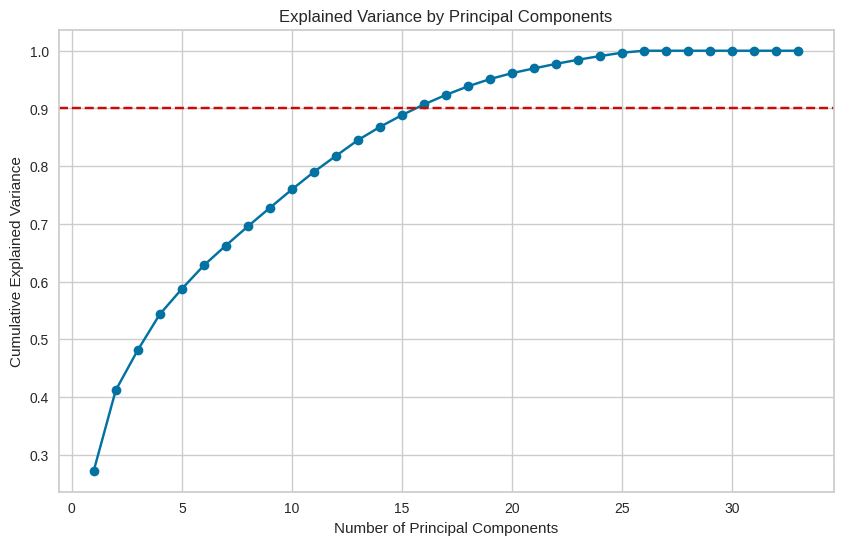

In [ ]:
# Reduce dimensionality of the features through principal component analysis
pca = PCA()

# Fit the model to the data
pca.fit(X)

# Transform the data to the new principal components
pca_transformed_data = pca.transform(X)

combined_data = np.concatenate((X, pca_transformed_data), axis=1)

# Explained variance ratio (to see how much variance each component explains)
explained_variance = pca.explained_variance_ratio_

# Display the explained variance of each component
print("Explained Variance Ratio:")
print(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.9, color='r', linestyle='--')  # 90% threshold line
plt.show()

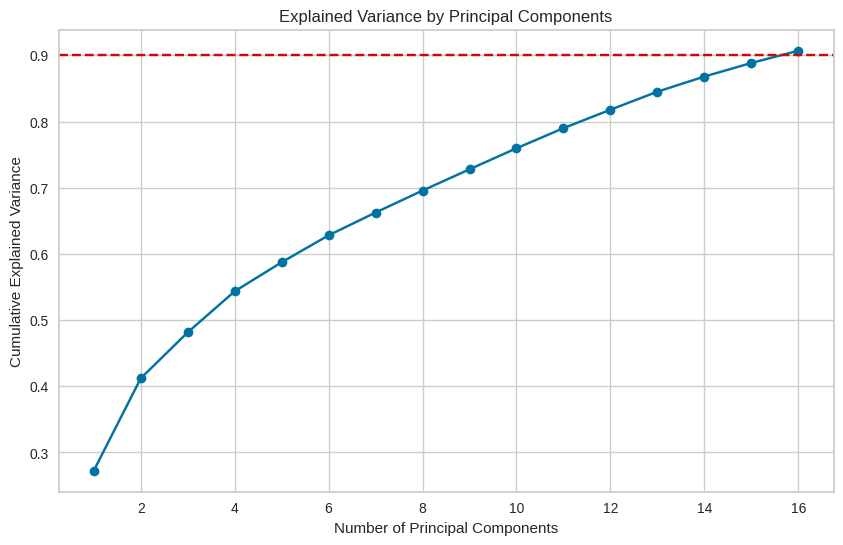

In [ ]:
#Ideal number of components
pca = PCA(n_components = 16)

# Fit the model to the data
pca.fit(X)

# Transform the data to the new principal components
pca_transformed_data = pca.transform(X)

combined_data = np.concatenate((X, pca_transformed_data), axis=1)

# Explained variance ratio (to see how much variance each component explains)
explained_variance = pca.explained_variance_ratio_

# Display the explained variance of each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.9, color='r', linestyle='--')  # 90% threshold line
plt.show()

# Ideal number of components = 16

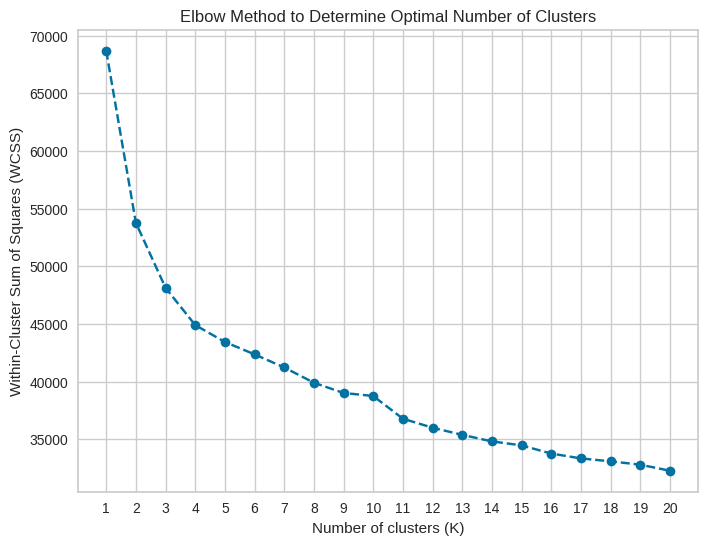

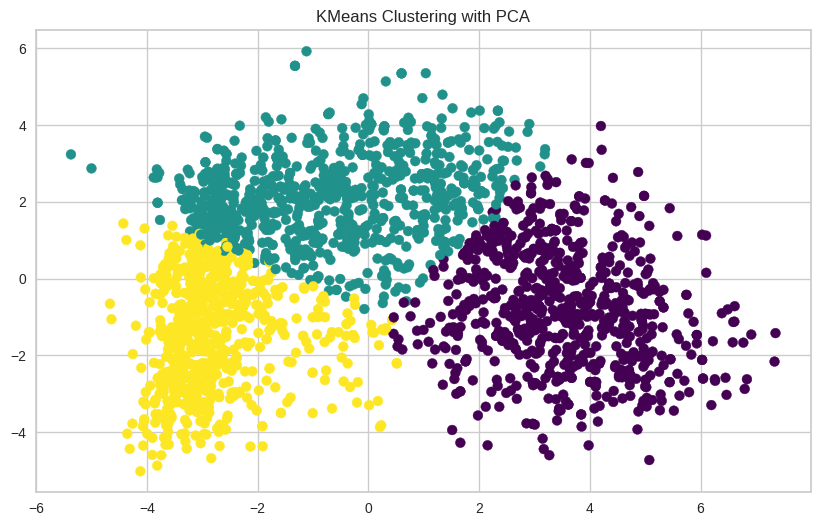

In [ ]:
# Create clusters based on principal components
clusters = []
cluster_range = range(1, 21)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, clusters, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X)
data['cluster'] = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('KMeans Clustering with PCA')
plt.show()

# Ideal number of clusters = 3

In [ ]:
# Examine how the clusters differ in their purchase behavior
purchase_behavior = data.groupby('cluster').agg({
    'total_purchases': 'sum',
    'wine_spend_prop': 'mean',
    'fruits_spend_prop': 'mean',
    'meat_spend_prop': 'mean',
    'fish_spend_prop': 'mean',
    'sweet_spend_prop': 'mean',
    'gold_spend_prop': 'mean',
    'channel_purchases': 'sum',
    'NumWebPurchases': 'sum',
    'NumCatalogPurchases': 'sum',
    'NumStorePurchases': 'mean',
    'preferred_channel_mapping': pd.Series.mode,
    'MntWines': 'sum',
    'MntFruits': 'sum',
    'MntMeatProducts': 'sum',
    'MntFishProducts': 'sum',
    'MntSweetProducts': 'sum',
    'MntGoldProds': 'sum'
})
print("Purchasing Behavior by Cluster:\n", purchase_behavior)

# Examine how the clusters differ in their response to campaign
campaign_response = data.groupby('cluster').agg({
    'AcceptedCmp1': 'sum',
    'AcceptedCmp2': 'sum',
    'AcceptedCmp3': 'sum',
    'AcceptedCmp4': 'sum',
    'AcceptedCmp5': 'sum',
    'AcceptedCmp6': 'sum',
    'response_rate': 'mean',
    'campaign_profit': 'sum',
    'total_camp_purchases': 'sum',
    'previous_camps': 'sum'
})
print("\nCampaign Response by Cluster:\n", campaign_response)

# Examine how the different customer clusters react to discounts
discount_sensitivity = data.groupby('cluster').agg({
    'NumDealsPurchases': 'sum'
})
print("\nDiscount Sensitivity by Cluster:\n", discount_sensitivity)

Purchasing Behavior by Cluster:
          total_purchases  wine_spend_prop  fruits_spend_prop  meat_spend_prop  \
cluster                                                                         
0                 934158         0.438580           0.053853         0.309929   
1                 343056         0.652952           0.020814         0.184235   
2                  68065         0.265276           0.076839         0.259500   

         fish_spend_prop  sweet_spend_prop  gold_spend_prop  \
cluster                                                       
0               0.076906          0.056578         0.064153   
1               0.028258          0.019655         0.094085   
2               0.114432          0.079101         0.204852   

         channel_purchases  NumWebPurchases  NumCatalogPurchases  \
cluster                                                            
0                    14187             3943                 4085   
1                     9570             36

In [ ]:
# Suppose you limited the campaign to specific clusters. Calculate the total
# profit for each cluster, the profit per customer in that cluster (as a measure of
# profitability), and the percentage of your customer base represented by that cluster
# (as a measure of reach).

cluster_campaign_profit = data.groupby('cluster').agg(
    num_customers=('cluster', 'size'),
    total_profit= ('campaign_profit', 'sum')
)

cluster_campaign_profit['profit_per_customer'] = cluster_campaign_profit['total_profit']/cluster_campaign_profit['num_customers']
cluster_campaign_profit['total_customers'] = data.shape[0]
cluster_campaign_profit['percentage_of_base'] = cluster_campaign_profit['num_customers']/cluster_campaign_profit['total_customers']
cols_to_show = ['total_profit', 'profit_per_customer', 'percentage_of_base']
print(cluster_campaign_profit[cols_to_show])

         total_profit  profit_per_customer  percentage_of_base
cluster                                                       
0               71.68             0.100252            0.322653
1            -1414.81            -1.800013            0.354693
2            -1656.89            -2.317329            0.322653


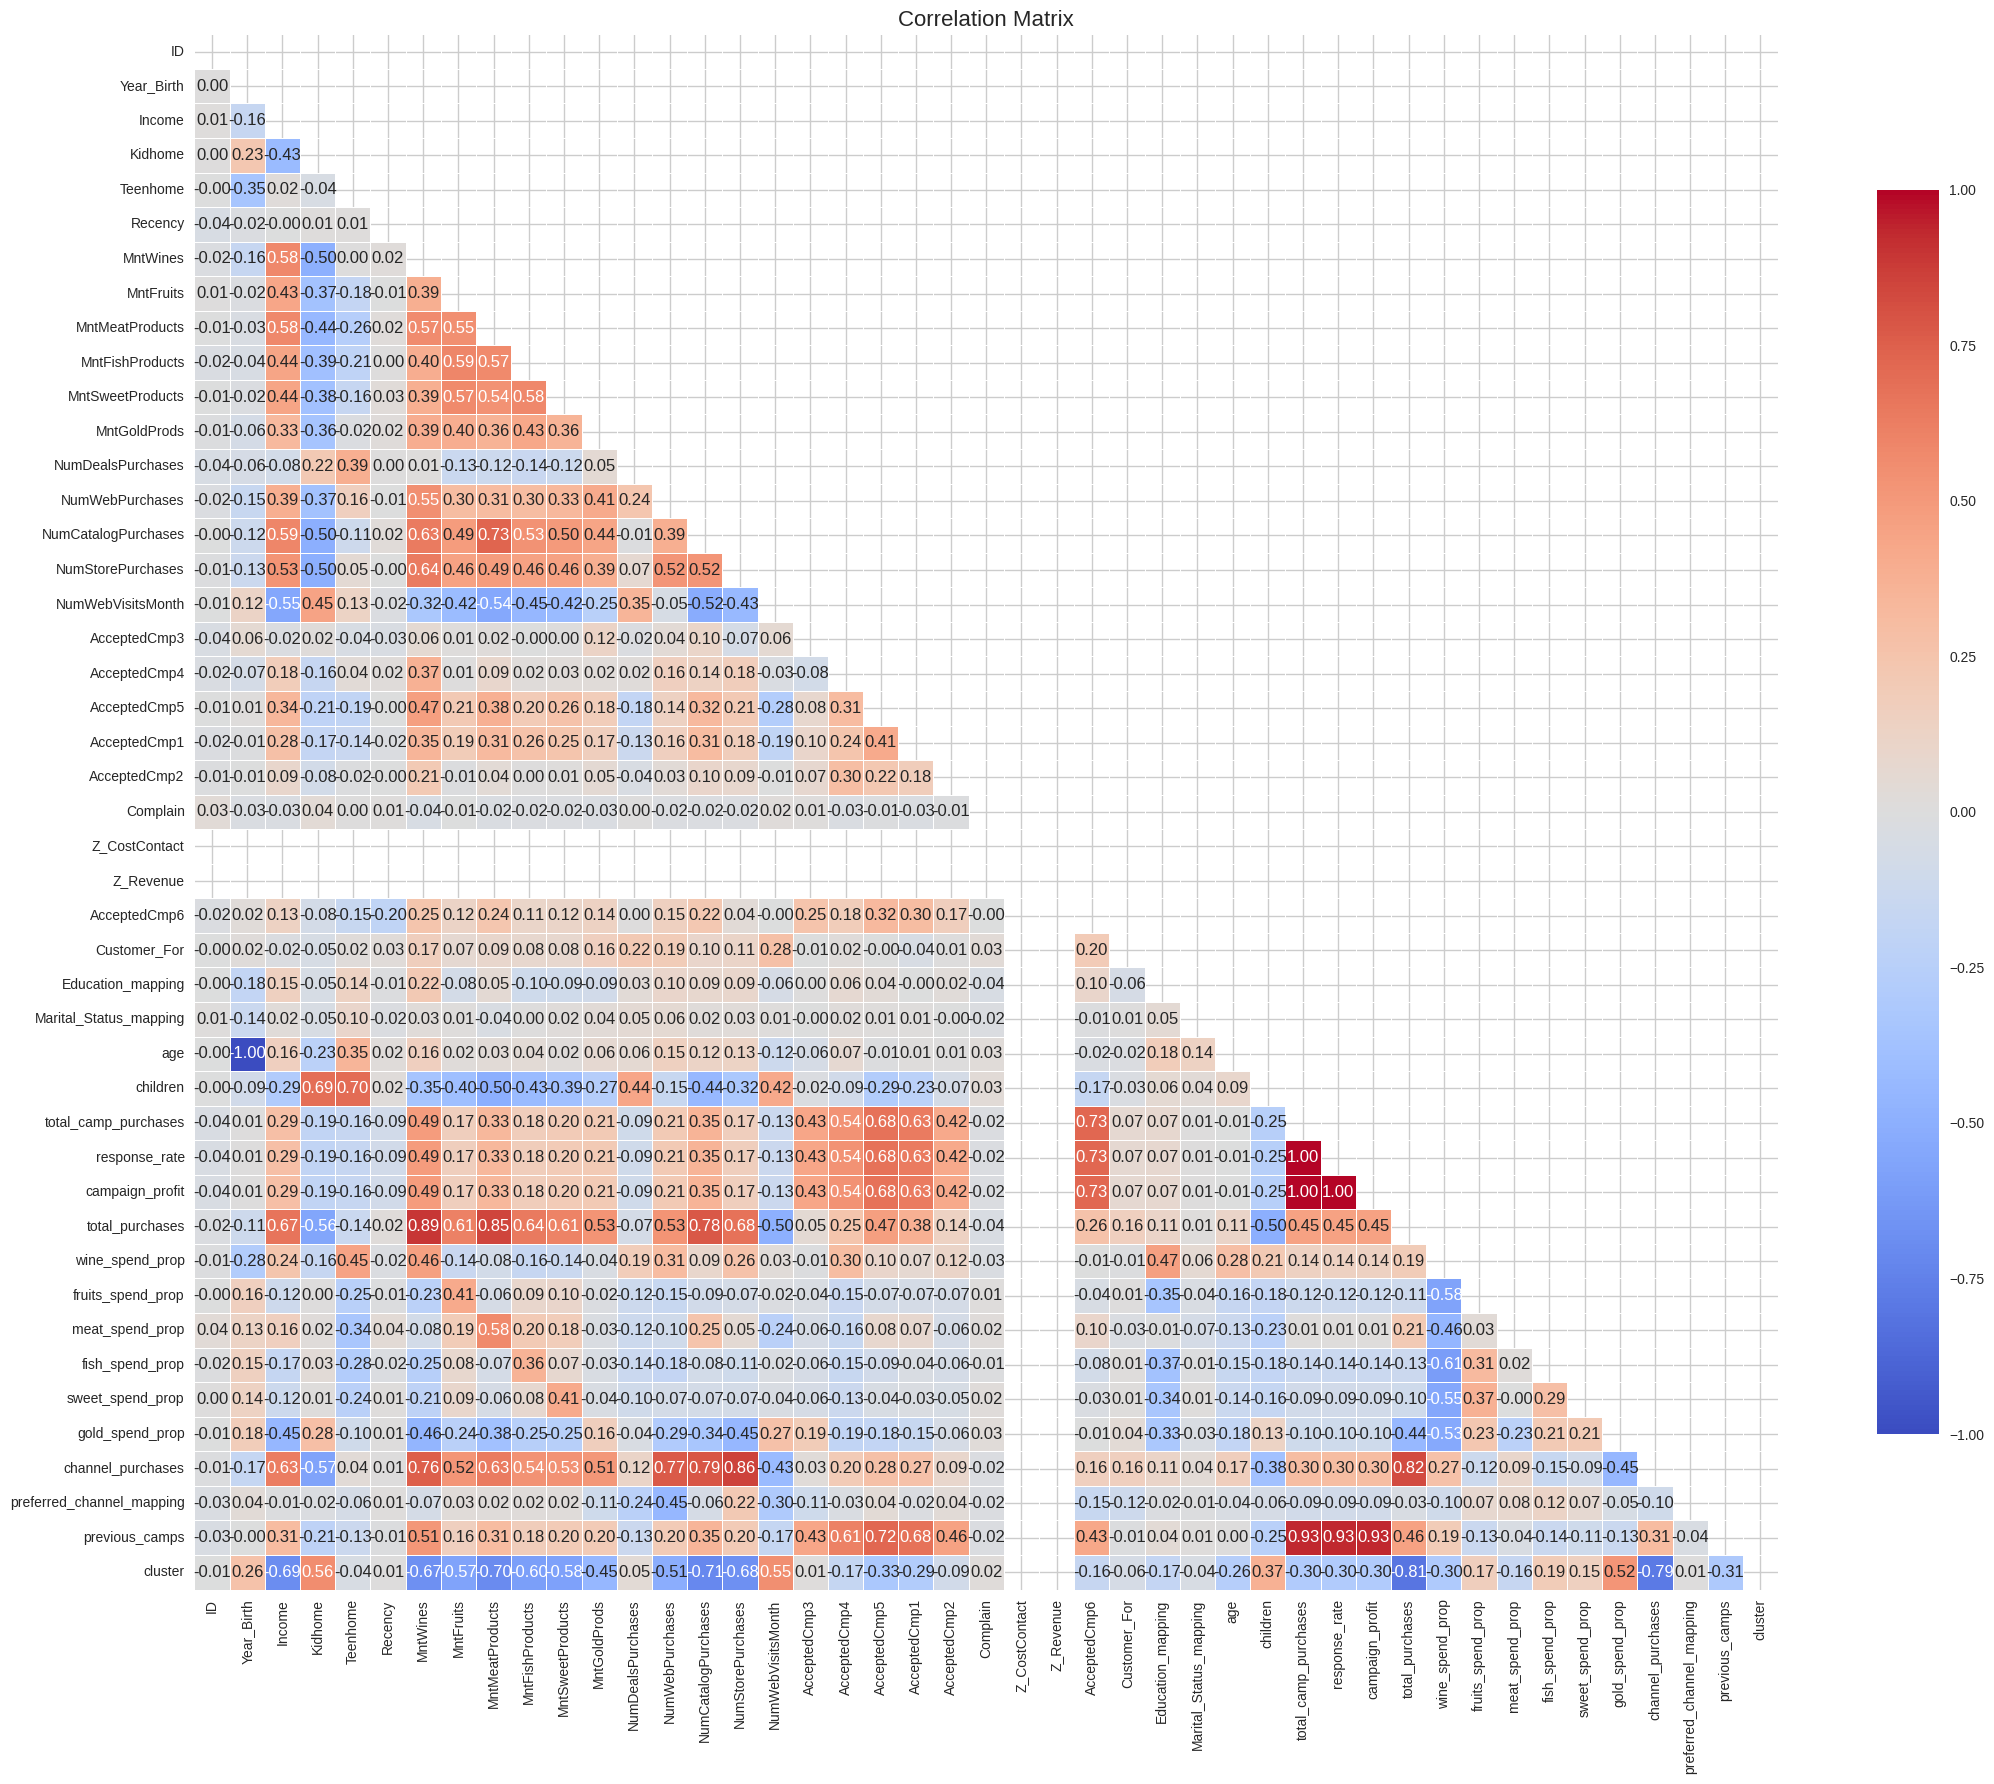

In [ ]:
numeric_columns = data.select_dtypes(include=['int64', 'float64', 'int32']).columns
correlation_matrix = data[numeric_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         2216 non-null   int64         
 1   Year_Birth                 2216 non-null   int64         
 2   Education                  2216 non-null   object        
 3   Marital_Status             2216 non-null   object        
 4   Income                     2216 non-null   int64         
 5   Kidhome                    2216 non-null   int64         
 6   Teenhome                   2216 non-null   int64         
 7   Dt_Customer                2216 non-null   datetime64[ns]
 8   Recency                    2216 non-null   int64         
 9   MntWines                   2216 non-null   int64         
 10  MntFruits                  2216 non-null   int64         
 11  MntMeatProducts            2216 non-null   int64         
 12  MntFishProd

In [ ]:
column = data.columns.tolist()
print(column)

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp6', 'Customer_For', 'Education_mapping', 'Marital_Status_mapping', 'age', 'children', 'total_camp_purchases', 'response_rate', 'campaign_profit', 'total_purchases', 'wine_spend_prop', 'fruits_spend_prop', 'meat_spend_prop', 'fish_spend_prop', 'sweet_spend_prop', 'gold_spend_prop', 'channel_purchases', 'preferred_channel', 'preferred_channel_mapping', 'previous_camps', 'cluster']


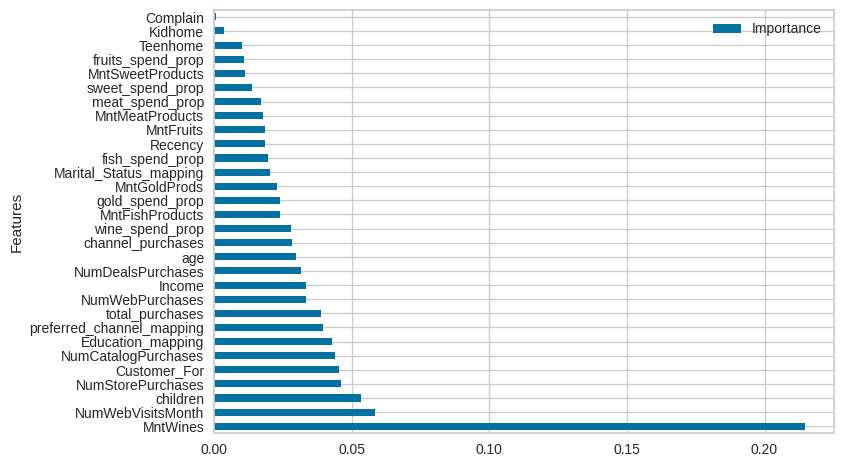

                     Features  Importance
4                    MntWines    0.214528
14          NumWebVisitsMonth    0.058406
19                   children    0.053339
13          NumStorePurchases    0.046063
15               Customer_For    0.045556
12        NumCatalogPurchases    0.043786
16          Education_mapping    0.042730
28  preferred_channel_mapping    0.039708
20            total_purchases    0.038991
11            NumWebPurchases    0.033364
0                      Income    0.033276
10          NumDealsPurchases    0.031594
18                        age    0.029626
27          channel_purchases    0.028305
21            wine_spend_prop    0.027784
7             MntFishProducts    0.023953
26            gold_spend_prop    0.023884
9                MntGoldProds    0.023026
17     Marital_Status_mapping    0.020220
24            fish_spend_prop    0.019527
3                     Recency    0.018470
5                   MntFruits    0.018432
6             MntMeatProducts    0

In [ ]:
# Create a predictive model that predicts the total purchases made by a customer for a campaign like this

X = data[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
          'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
          'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
          'NumWebVisitsMonth', 'Customer_For', 'Education_mapping', 'Marital_Status_mapping',
          'age', 'children', 'total_purchases', 'wine_spend_prop', 'fruits_spend_prop',
          'meat_spend_prop', 'fish_spend_prop', 'sweet_spend_prop', 'gold_spend_prop',
          'channel_purchases', 'preferred_channel_mapping', 'Complain']]
y = data['campaign_profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(random_state = 42)
model.fit(X_train, y_train)

importance = model.feature_importances_
feature_importance = pd.DataFrame({'Features': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.plot(x='Features', y='Importance', kind='barh')
plt.show()
print(feature_importance)

In [ ]:
# Model performance evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE", rmse)

RMSE 2.33411014566206


In [ ]:
# Decision rule for selecting specific customers to be targeted by the campaign

# decision rule: target customers with predicted campaign purchases > cost of the campaign per customer
# Want to return more than the cost per customer
cost_per_customer = 3
threshold = cost_per_customer
y_pred_invited = (y_pred > threshold)

# Profits based on decision rule, the profit per invited customer, and percentage  of customers invited

invited_customers = X_test.index[y_pred_invited]
total_invited = len(invited_customers)

revenue_per_purchase = 3.67
total_profit = (revenue_per_purchase * y_test[invited_customers] - cost_per_customer).sum()

profit_per_customer = total_profit/total_invited if total_invited >0 else 0

percentage_invited = (total_invited/X_test.shape[0])*100

print("Total Profit:", total_profit)
print("Profit per Customer Invited:", profit_per_customer)
print("Percentage of Customers Invited:", percentage_invited)

Total Profit: 398.05629999999996
Profit per Customer Invited: 11.057119444444444
Percentage of Customers Invited: 8.108108108108109


In [ ]:
# Compare to a selection based on clustering from 5
# Using cluster 0 as they are the only profitable cluster

cluster0 = data[data['cluster'] == 0]
cluster0_campaign_profit = cluster0.groupby('cluster').agg(
    num_customers=('cluster', 'size'),
    total_profit= ('campaign_profit', 'sum')
)

cluster0_campaign_profit['profit_per_customer'] = cluster0_campaign_profit['total_profit']/cluster0_campaign_profit['num_customers']
cluster0_campaign_profit['total_customers'] = data.shape[0]
cluster0_campaign_profit['percentage_of_base'] = cluster0_campaign_profit['num_customers']/cluster0_campaign_profit['total_customers'] * 100

cluster0_total_profit = cluster0_campaign_profit['total_profit'].iloc[0]
cluster0_profit_per_customer = cluster0_campaign_profit['profit_per_customer'].iloc[0]
cluster0_percentage_of_base = cluster0_campaign_profit['percentage_of_base'].iloc[0]

print("Total Profit from model vs. cluster 0:", total_profit, "vs.",cluster0_total_profit)
print("Profit per customer from model vs. cluster 0:", profit_per_customer, "vs.",cluster0_profit_per_customer)
print("Percentage of customers invited from model vs. cluster 0:", percentage_invited, "vs.",cluster0_percentage_of_base)

Total Profit from model vs. cluster 0: 398.05629999999996 vs. 71.67999999999998
Profit per customer from model vs. cluster 0: 11.057119444444444 vs. 0.10025174825174822
Percentage of customers invited from model vs. cluster 0: 8.108108108108109 vs. 32.265342960288805
